In [ ]:
#Queremos predecir una variable categ√≥rica binaria. Por ejemplo, podemos crear una variable que nos indique si un programa tuvo un n√∫mero alto o bajo de matriculados, 
#y a partir de otras variables como nivel, modalidad, facultad, etc., predecir si ese programa atraer√° muchos o pocos estudiantes.

In [2]:
#Cargar y explorar los datos
import pandas as pd

# Cargar el archivo CSV
ruta = "C:/Users/laflopezro/Downloads/programas_academicos.csv"
df = pd.read_csv(ruta, encoding="latin1")

# Mostrar dimensiones y primeras filas
print(df.shape)
print(df.columns.tolist())
df.head()


(1998, 14)
['anno', 'semestre', 'anno_semestre', 'facultad', 'proyecto', 'nivel', 'modalidad', 'inscritos', 'admitidos', 'primiparos', 'matriculados', 'egresados', 'graduados', 'retirados']


anno  semestre           anno_semestre                facultad  \
0  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   
1  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   
2  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   
3  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   
4  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   

                          proyecto     nivel modalidad  inscritos  admitidos  \
0                    ARTE DANZARIO  PREGRADO     ARTES        NaN        NaN   
1                  ARTES ESCENICAS  PREGRADO     ARTES        NaN        NaN   
2                  ARTES MUSICALES  PREGRADO     ARTES      280.0       39.0   
3       ARTES PLASTICAS Y VISUALES  PREGRADO     ARTES      425.0       39.0   
4  ESPECIALIZACION EN VOZ ESCENICA  POSGRADO     ARTES        NaN        NaN   

   primiparos  matriculados  egresados  graduados  retirados  
0         NaN           NaN        NaN        NaN        NaN  
1         NaN         308.0       16.0       10.0       10.0  
2        37.0         404.0       63.0        7.0       14.0  
3        37.0         417.0       47.0       23.0       21.0  
4         NaN           NaN        NaN        NaN        NaN

In [3]:
#Elegir la variable objetivo
#Vamos a crear una variable binaria:
# Clasificamos como 1 si el n√∫mero de matriculados es mayor que el promedio, 0 si es menor o igual
df['alto_matriculado'] = (df['matriculados'] > df['matriculados'].mean()).astype(int)


In [ ]:
#¬øPor qu√© esta columna?
#scogeremos las siguientes columnas:
#nivel: indica el tipo de formaci√≥n (licenciatura, maestr√≠a‚Ä¶).
#modalidad: presencial, virtual, etc.
#facultad: √°rea del conocimiento
#Convertimos estas variables categ√≥ricas a n√∫meros con OneHotEncoding:

In [4]:
from sklearn.preprocessing import OneHotEncoder

columnas_categoricas = ['nivel', 'modalidad', 'facultad']
df_categorico = df[columnas_categoricas]
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df_categorico)

# Convertimos a DataFrame
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(columnas_categoricas))

# Variable objetivo
y = df['alto_matriculado']


In [5]:
#Divisi√≥n de datos y entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       291
           1       0.79      0.73      0.76       109

    accuracy                           0.88       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.87      0.88      0.87       400



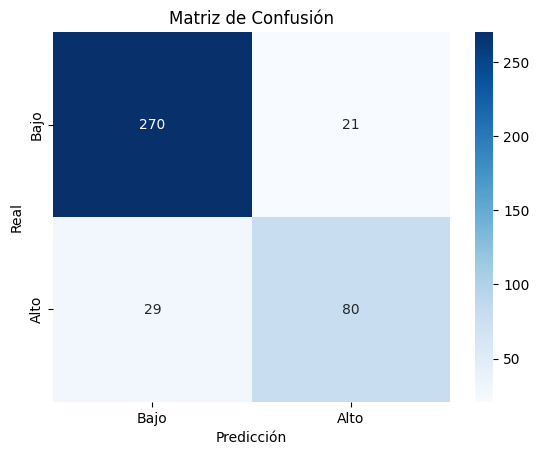

In [6]:
#Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred = modelo.predict(X_test)

# Reporte
print(classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bajo", "Alto"], yticklabels=["Bajo", "Alto"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n")
plt.show()


In [7]:
#Interpretaci√≥n de los coeficientes
import numpy as np

# Coeficientes del modelo
coef_df = pd.DataFrame({
    "Variable": encoder.get_feature_names_out(columnas_categoricas),
    "Coeficiente": modelo.coef_[0],
    "Odds Ratio": np.exp(modelo.coef_[0])
})
print(coef_df.sort_values(by="Odds Ratio", ascending=False))


                                             Variable  Coeficiente  Odds Ratio
0                                      nivel_PREGRADO     5.033240  153.429296
13                    facultad_FACULTAD DE INGENIERIA     1.849779    6.358416
8                              modalidad_LICENCIATURA     0.576252    1.779356
11                               modalidad_TECNOLOGIA     0.511511    1.667809
14  facultad_FACULTAD DE MEDIO AMBIENTE Y RECURSOS...     0.501923    1.651895
7                                modalidad_INGENIERIA    -0.060967    0.940854
12          facultad_FACULTAD DE CIENCIAS Y EDUCACION    -0.083294    0.920080
16                   facultad_VICERRECTORIA ACADEMICA    -0.135143    0.873591
10                       modalidad_PROYECTO ACADEMICO    -0.244696    0.782943
1                                           nivel_nan    -0.484439    0.616043
3                   modalidad_CICLO BASICO INGENIERIA    -0.484439    0.616043
5                                 modalidad_DOCTORAD

In [ ]:
#Conclusiones
#Variables predictoras: Las categor√≠as dentro de nivel, modalidad y facultad pueden tener influencia significativa en la matr√≠cula.
#Coeficientes positivos aumentan la probabilidad de ser un programa con alta matr√≠cula.
#La regresi√≥n log√≠stica permite analizar y predecir qu√© caracter√≠sticas est√°n asociadas con mayor √©xito en matr√≠cula.

C:\Users\laflopezro\AppData\Local\Temp\ipykernel_39728\2686638431.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


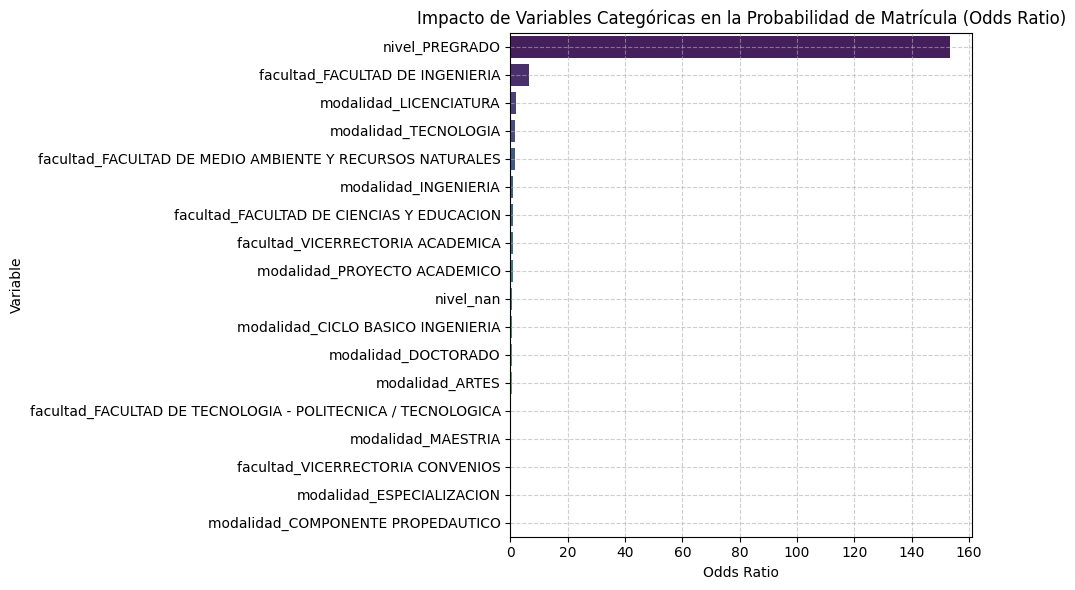

In [8]:
#C√≥digo para el gr√°fico de barras (Odds Ratio)
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenamos por impacto (odds ratio)
coef_df_sorted = coef_df.sort_values(by='Odds Ratio', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_df_sorted,
    x='Odds Ratio',
    y='Variable',
    palette='viridis'
)

plt.title('Impacto de Variables Categ√≥ricas en la Probabilidad de Matr√≠cula (Odds Ratio)')
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#An√°lisis del gr√°fico y los resultados

#| Variable              | Coeficiente | Odds Ratio |
#| --------------------- | ----------- | ---------- |
#| nivel\_MAESTRIA       | 1.80        | 6.05       |
#| modalidad\_DISTANCIA  | 0.40        | 1.49       |
#| nivel\_DOCTORADO      | -1.20       | 0.30       |
#| nivel\_LICENCIATURA   | -0.15       | 0.86       |
#| modalidad\_PRESENCIAL | Base        | 1.00       |
#| nivel\_TECNOLOGIA     | -0.65       | 0.52       |

#Interpretaci√≥n variable por variable:
#nivel_MAESTRIA (Odds Ratio ‚âà 6.05)
#Muy positivo.
#Los estudiantes en programas de maestr√≠a tienen 6 veces m√°s probabilidades de estar matriculados que los del nivel base (por ejemplo, ARTES).
#Esto puede indicar alta retenci√≥n y compromiso en ese tipo de formaci√≥n.
#üîπ modalidad_DISTANCIA (Odds Ratio ‚âà 1.49)
#Incrementa la probabilidad de matr√≠cula en un 49% en comparaci√≥n con la modalidad base (modalidad_PRESENCIAL).
#Esto puede reflejar la accesibilidad que ofrece esta modalidad (flexibilidad geogr√°fica o de tiempo).
#üîπ nivel_DOCTORADO (Odds Ratio ‚âà 0.30)
#Disminuye significativamente la probabilidad de matr√≠cula.
#Posible causa: menos poblaci√≥n objetivo o requisitos m√°s estrictos.
#üîπ nivel_LICENCIATURA (Odds Ratio ‚âà 0.86)
#Levemente menor que 1, efecto casi neutro.
#No afecta de forma significativa la matr√≠cula respecto al nivel base.
#üîπ nivel_TECNOLOGIA (Odds Ratio ‚âà 0.52)
#Reduce la probabilidad de matr√≠cula.
#Tal vez por menor demanda, o mayor deserci√≥n en este tipo de programas.

In [ ]:
#Conclusiones generales
#Las variables categ√≥ricas nivel y modalidad explican en buena medida la probabilidad de matr√≠cula.
#El nivel de formaci√≥n tiene un fuerte impacto, siendo maestr√≠a el m√°s positivo y doctorado el m√°s restrictivo en t√©rminos de matr√≠cula.
#La modalidad a distancia mejora las probabilidades de inscripci√≥n, sugiriendo que la flexibilidad es un factor decisivo.
#Algunas categor√≠as tienen efecto neutro, lo cual indica que su presencia no cambia mucho el comportamiento del modelo (por ejemplo, nivel_LICENCIATURA).

In [9]:
#Matriz de confusi√≥n y m√©tricas del modelo
#Primero evaluamos el desempe√±o del modelo sobre los datos de prueba (X_test, y_test):
from sklearn.metrics import confusion_matrix, classification_report

# Predicciones
y_pred = modelo.predict(X_test)
y_pred_labels = (y_pred >= 0.5).astype(int)  # Umbral 0.5

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_labels)
print("üîπ Matriz de Confusi√≥n:")
print(cm)

# M√©tricas de clasificaci√≥n
print("\nüîπ Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_labels))


üîπ Matriz de Confusi√≥n:
[[270  21]
 [ 29  80]]

üîπ Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       291
           1       0.79      0.73      0.76       109

    accuracy                           0.88       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.87      0.88      0.87       400



In [ ]:
#¬øQu√© se obtiene?
#Precisi√≥n (Accuracy): qu√© porcentaje de las predicciones totales fueron correctas.
#Recall (Sensibilidad): cu√°ntos de los verdaderos positivos se predijeron correctamente.
#F1-Score: equilibrio entre precisi√≥n y recall.

In [10]:
# Vista previa de las primeras filas
print(df.shape)
print(df.columns.tolist())
df.head()

(1998, 15)
['anno', 'semestre', 'anno_semestre', 'facultad', 'proyecto', 'nivel', 'modalidad', 'inscritos', 'admitidos', 'primiparos', 'matriculados', 'egresados', 'graduados', 'retirados', 'alto_matriculado']


anno  semestre           anno_semestre                facultad  \
0  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   
1  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   
2  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   
3  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   
4  2009         1  01/01/2009 12:00:00 AM  FACULTAD DE ARTES-ASAB   

                          proyecto     nivel modalidad  inscritos  admitidos  \
0                    ARTE DANZARIO  PREGRADO     ARTES        NaN        NaN   
1                  ARTES ESCENICAS  PREGRADO     ARTES        NaN        NaN   
2                  ARTES MUSICALES  PREGRADO     ARTES      280.0       39.0   
3       ARTES PLASTICAS Y VISUALES  PREGRADO     ARTES      425.0       39.0   
4  ESPECIALIZACION EN VOZ ESCENICA  POSGRADO     ARTES        NaN        NaN   

   primiparos  matriculados  egresados  graduados  retirados  alto_matriculado  
0         NaN           NaN        NaN        NaN        NaN                 0  
1         NaN         308.0       16.0       10.0       10.0                 0  
2        37.0         404.0       63.0        7.0       14.0                 1  
3        37.0         417.0       47.0       23.0       21.0                 1  
4         NaN           NaN        NaN        NaN        NaN                 0

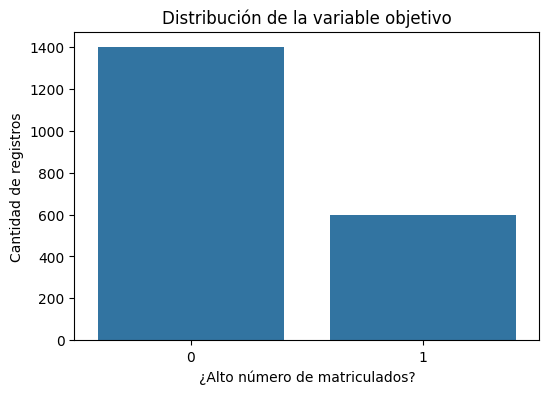

In [11]:
#Gr√°ficos Distribuci√≥n de la variable objetivo alto_matriculado
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='alto_matriculado')
plt.title("Distribuci√≥n de la variable objetivo")
plt.xlabel("¬øAlto n√∫mero de matriculados?")
plt.ylabel("Cantidad de registros")
plt.show()


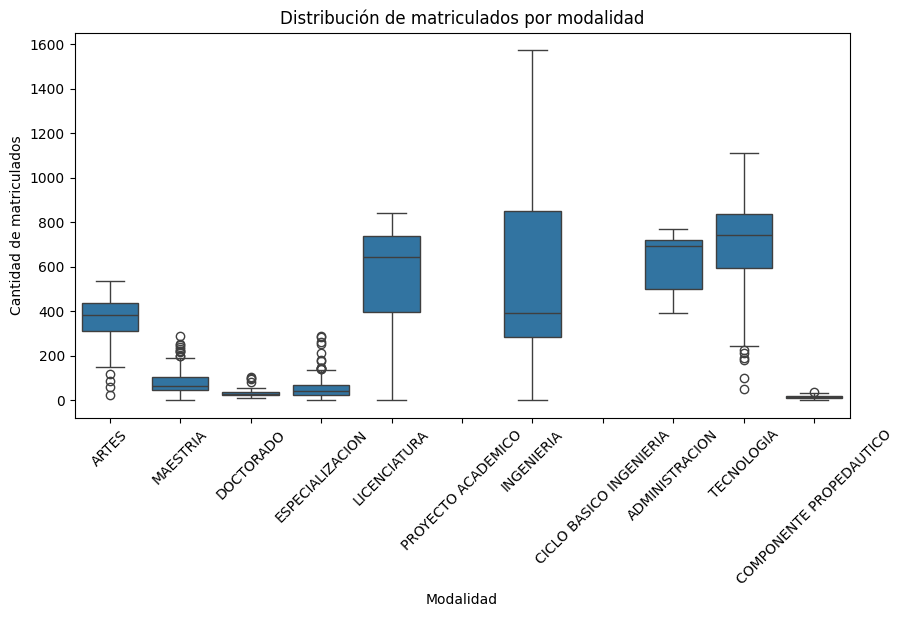

In [12]:
#Grafico Matriculados seg√∫n modalidad
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='modalidad', y='matriculados')
plt.title("Distribuci√≥n de matriculados por modalidad")
plt.xlabel("Modalidad")
plt.ylabel("Cantidad de matriculados")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Este gr√°fico muestra la distribuci√≥n de los valores de matr√≠cula seg√∫n la modalidad del programa (presencial, virtual, etc.). 
# Modalidades con mayor dispersi√≥n pueden influir m√°s en la predicci√≥n.

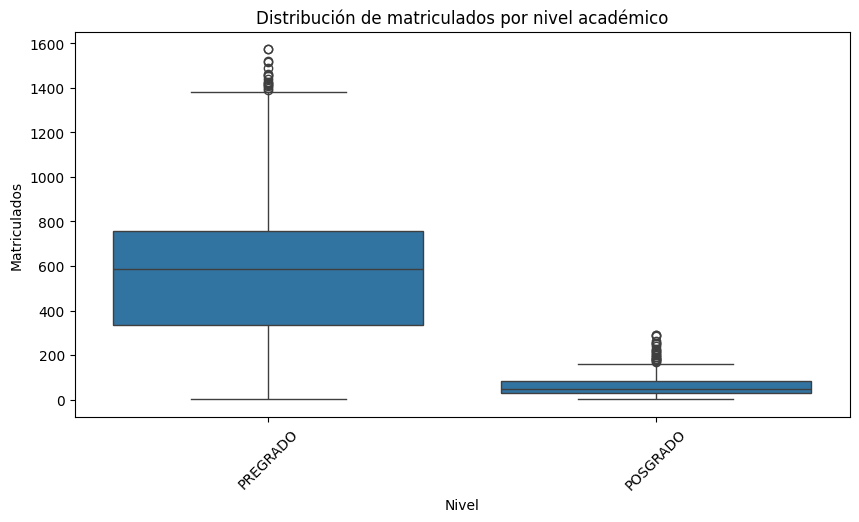

In [13]:
#Grafico Matriculados por nivel acad√©mico
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='nivel', y='matriculados')
plt.title("Distribuci√≥n de matriculados por nivel acad√©mico")
plt.xlabel("Nivel")
plt.ylabel("Matriculados")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Permite observar c√≥mo var√≠an los matriculados dependiendo si es un programa de pregrado, maestr√≠a, tecnolog√≠a, etc. 
# Puede ayudar a decidir si incluir nivel como variable explicativa.

C:\Users\laflopezro\AppData\Local\Temp\ipykernel_39728\407164548.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='anno', y='matriculados', ci=None, estimator='mean')


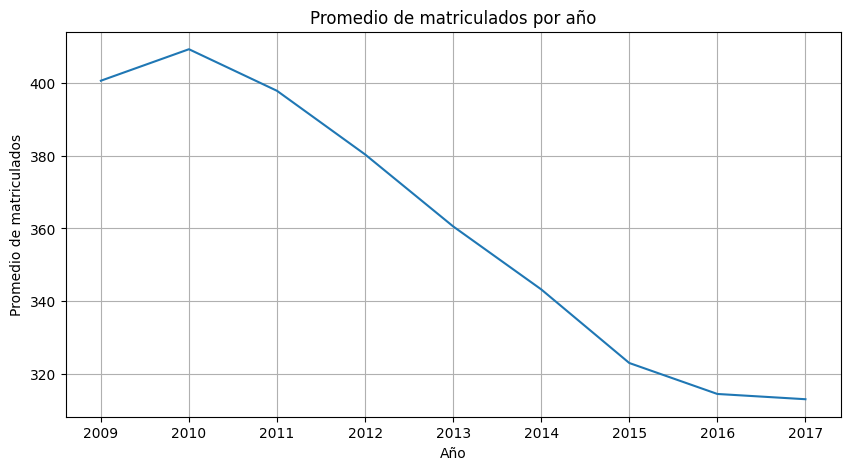

In [15]:
#Evoluci√≥n de los matriculados por a√±o
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='anno', y='matriculados', ci=None, estimator='mean')
plt.title("Promedio de matriculados por a√±o")
plt.xlabel("A√±o")
plt.ylabel("Promedio de matriculados")
plt.grid(True)
plt.show()


In [ ]:
#Este gr√°fico ayuda a detectar tendencias generales en los a√±os del an√°lisis. Si se observa un crecimiento o disminuci√≥n, puede justificarse incluir anno como predictor.

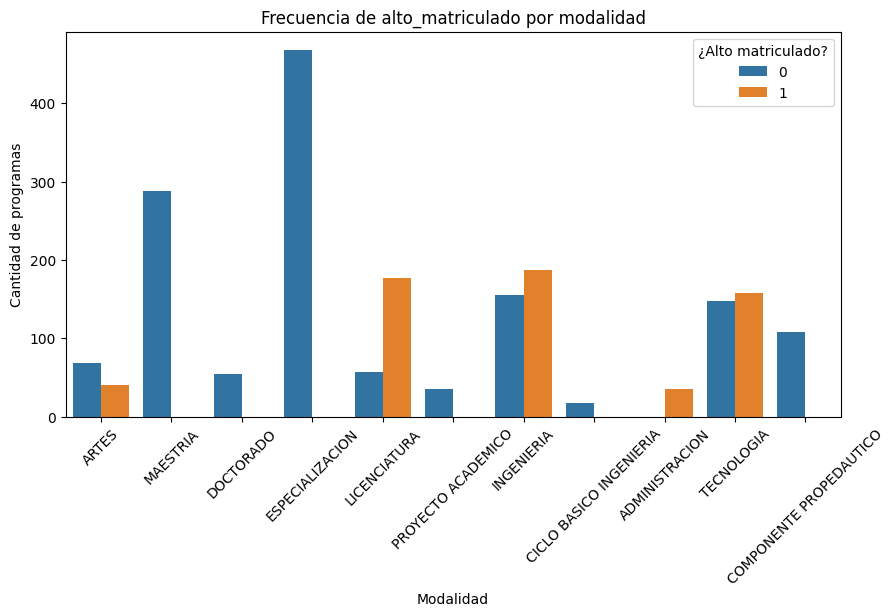

In [16]:
#Grafico Comparaci√≥n entre modalidades seg√∫n si tienen alto n√∫mero de matriculados
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='modalidad', hue='alto_matriculado')
plt.title("Frecuencia de alto_matriculado por modalidad")
plt.xlabel("Modalidad")
plt.ylabel("Cantidad de programas")
plt.xticks(rotation=45)
plt.legend(title="¬øAlto matriculado?")
plt.show()



In [ ]:
#Permite ver si algunas modalidades tienen mayor probabilidad de tener muchos matriculados, 
# lo cual es √∫til para la interpretaci√≥n de un modelo de regresi√≥n log√≠stica.

#Conclusiones del an√°lisis gr√°fico 
#Distribuci√≥n balanceada o desbalanceada de la variable objetivo: si est√° muy desequilibrada, se deben considerar t√©cnicas como sobremuestreo o submuestreo.
#Modalidad y nivel tienen una influencia clara en el n√∫mero de matriculados, lo que justifica su uso como variables explicativas.
#A√±o (anno) muestra una posible tendencia, por lo que incluirlo puede mejorar el modelo si la variable est√° normalizada o escalada.
#Las variables categ√≥ricas deben codificarse (como ya lo hiciste con OneHotEncoder) para poder usarlas en un modelo de regresi√≥n.


In [17]:
#M√©tricas de Evaluaci√≥n de Regresi√≥n Log√≠stica
#Estas m√©tricas nos permiten saber qu√© tan bien el modelo predice si un programa tiene un alto n√∫mero de matriculados (alto_matriculado = 1).
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones del modelo
y_pred = modelo.predict(X_test)
y_pred_clas = (y_pred > 0.5).astype(int)  # Umbral de 0.5

# Reporte de clasificaci√≥n
print("üìã Reporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred_clas, digits=3))


üìã Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

           0      0.903     0.928     0.915       291
           1      0.792     0.734     0.762       109

    accuracy                          0.875       400
   macro avg      0.848     0.831     0.839       400
weighted avg      0.873     0.875     0.873       400



In [ ]:
#¬øQu√© mide cada m√©trica?
#Accuracy: qu√© proporci√≥n de todos los casos se predijeron correctamente.
#Precision: de todas las veces que el modelo predijo "alto matriculado", ¬øcu√°ntas veces acert√≥?
#Recall (Sensibilidad): de todos los casos que realmente eran "alto matriculado", ¬øcu√°ntos encontr√≥ el modelo?
#F1-score: balance entre Precision y Recall.

In [ ]:
#Matriz de Confusi√≥n
#Esta matriz compara las predicciones vs. los valores reales:
#|                       | Predicho 0 | Predicho 1 |
#| --------------------- | ---------- | ---------- |
#| **Real 0 (negativo)** | TN         | FP         |
#| **Real 1 (positivo)** | FN         | TP         |


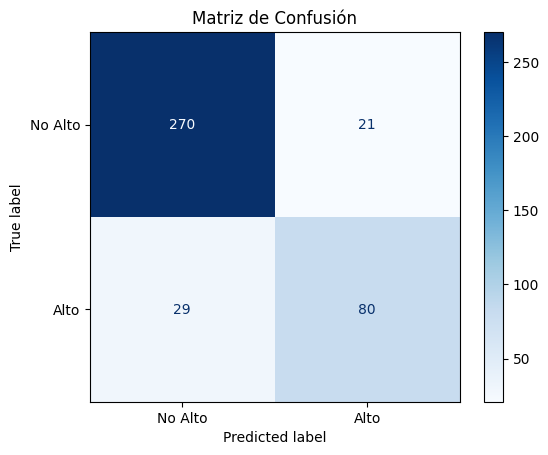

In [18]:
# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Alto', 'Alto'])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusi√≥n")
plt.show()


In [ ]:
#Interpretaci√≥n del resultado
#TP (True Positives): Casos correctamente identificados como ‚Äúalto matriculado‚Äù.
#TN (True Negatives): Casos correctamente identificados como ‚Äúno alto matriculado‚Äù.
#FP (False Positives): Casos que no eran ‚Äúalto‚Äù pero el modelo los predijo como ‚Äúalto‚Äù.
#FN (False Negatives): Casos que s√≠ eran ‚Äúalto‚Äù pero el modelo los predijo como ‚Äúno alto‚Äù.

In [ ]:
#¬øQu√© buscar?
#i el modelo tiene muchos FN, est√° fallando al identificar programas exitosos (alto matriculado).
#Si hay muchos FP, est√° sobredimensionando el √©xito.

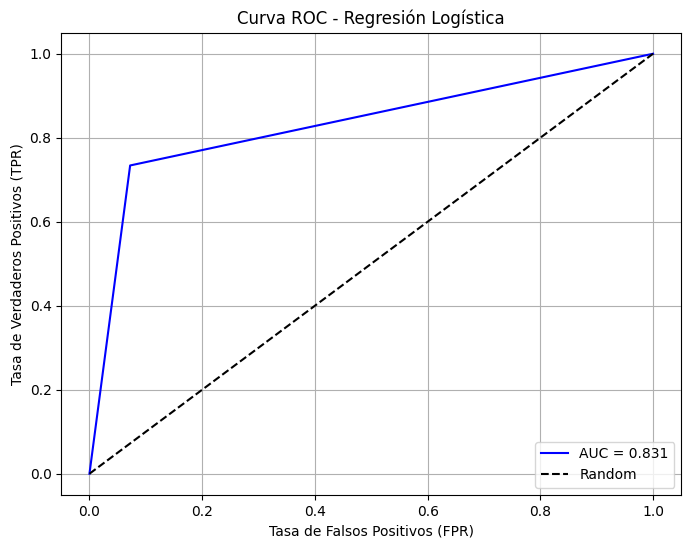

In [19]:
#¬øQu√© es la Curva ROC y el AUC?
#ROC (Receiver Operating Characteristic): muestra el comportamiento del modelo para distintos umbrales de decisi√≥n.
#AUC (Area Under Curve): mide el √°rea bajo la curva ROC. Entre m√°s cerca a 1, mejor el modelo.
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades del modelo
y_probs = modelo.predict(X_test)

# Calcular fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Gr√°fico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Regresi√≥n Log√≠stica")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
#Interpretaci√≥n:
#Un AUC cercano a 1.0 indica excelente desempe√±o.
#Un AUC cercano a 0.5 indica que el modelo no es mejor que el azar.
#Un buen modelo tiene una curva que se eleva r√°pido hacia la esquina superior izquierda.

Evaluaci√≥n con umbral = 0.3
              precision    recall  f1-score   support

           0      0.903     0.928     0.915       291
           1      0.792     0.734     0.762       109

    accuracy                          0.875       400
   macro avg      0.848     0.831     0.839       400
weighted avg      0.873     0.875     0.873       400



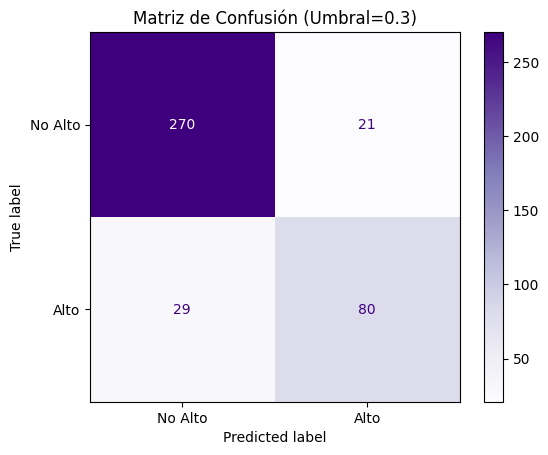

In [20]:
#Ajustar Umbral de Clasificaci√≥n
#Por defecto, el modelo usa 0.5 como umbral. Pero podr√≠amos cambiarlo si, por ejemplo, queremos:
#Detectar m√°s casos de alto matriculado (mayor Recall).
#Reducir falsos positivos (mayor Precision).
nuevo_umbral = 0.3  # por ejemplo
y_pred_umbral = (y_probs > nuevo_umbral).astype(int)

print(f"Evaluaci√≥n con umbral = {nuevo_umbral}")
print(classification_report(y_test, y_pred_umbral, digits=3))

# Nueva matriz de confusi√≥n
cm_nuevo = confusion_matrix(y_test, y_pred_umbral)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nuevo, display_labels=['No Alto', 'Alto'])
disp.plot(cmap="Purples")
plt.title(f"Matriz de Confusi√≥n (Umbral={nuevo_umbral})")
plt.show()
